# Praktikum 4 Post Test: Regresi Linear Sederhana

## Studi Kasus: Prediksi Revenue Es Krim berdasarkan Temperature

- Dataset: `IceCreamData.csv`
- Metode: Simple Linear Regression (`Temperature` → `Revenue`)
- Bahasa: Python
- Library: pandas, numpy, matplotlib, seaborn, scikit-learn

### Tujuan
Memprediksi pendapatan penjualan es krim berdasarkan suhu udara harian dan melakukan evaluasi serta interpretasi model.

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Load & Preview Dataset

In [2]:
# Load data
df = pd.read_csv('IceCreamData.csv')
df.head()

,Temperature,Revenue,Unnamed: 2
0,24.566884,534.799028,NaN
1,26.005191,625.190122,NaN
2,27.790554,660.632289,NaN
3,20.595335,487.706960,NaN
4,11.503498,316.240194,NaN


## 2. Eksplorasi & Statistik Deskriptif

In [3]:
# Cek missing value
print(df.isnull().sum())
# Statistik deskriptif
print(df.describe())

Temperature      1
Revenue          1
Unnamed: 2     500
dtype: int64
       Temperature     Revenue  Unnamed: 2
count   499.000000  499.000000         0.0
mean     22.186598  520.612001         NaN
std       8.039908  174.264336         NaN
min       0.000000   10.000000         NaN
25%      17.111720  405.455916         NaN
50%      22.387604  528.380417         NaN
75%      27.724420  641.626340         NaN
max      42.515280  969.291630         NaN


### Visualisasi Distribusi & Korelasi

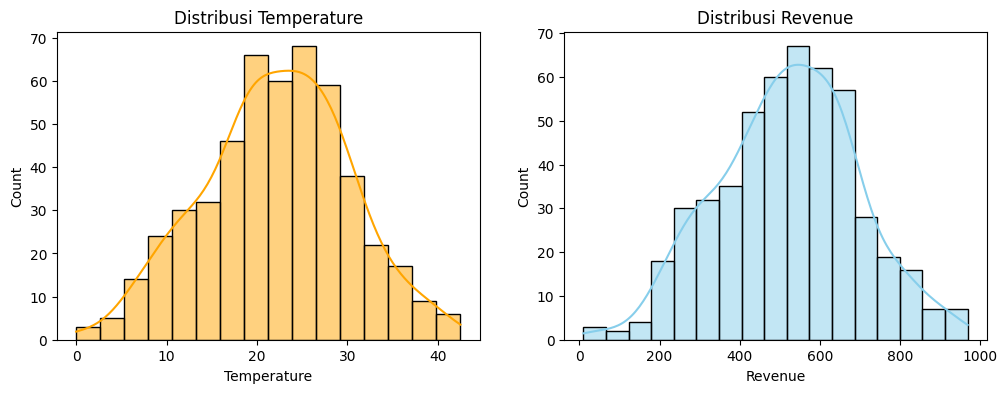

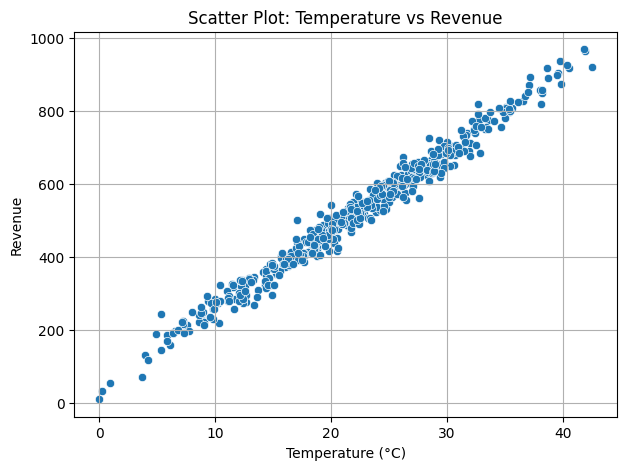

Korelasi Pearson: 0.9896493858537114


In [4]:
# Histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['Temperature'], kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribusi Temperature')
sns.histplot(df['Revenue'], kde=True, ax=ax[1], color='skyblue')
ax[1].set_title('Distribusi Revenue')
plt.show()

# Scatter plot hubungan temperature vs revenue
plt.figure(figsize=(7,5))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title('Scatter Plot: Temperature vs Revenue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Korelasi Pearson
print('Korelasi Pearson:', df.corr().loc['Temperature','Revenue'])

## 3. Cek Outlier (Boxplot)

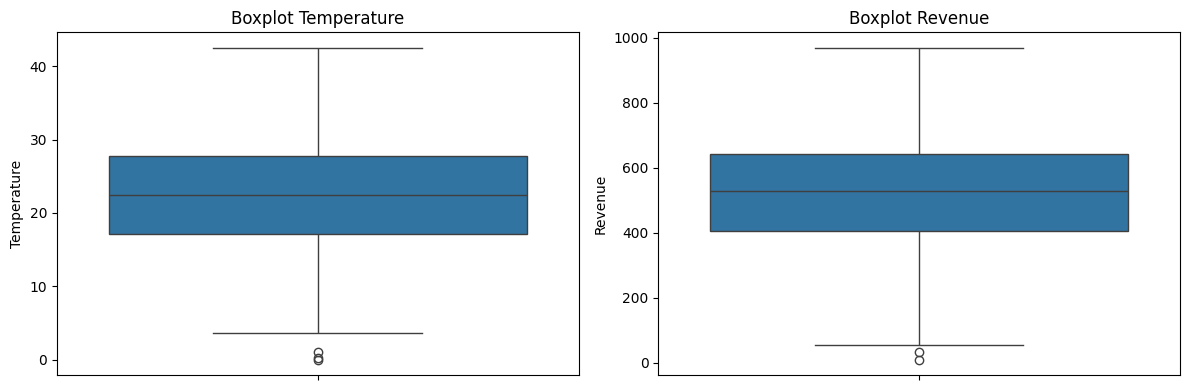

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(y=df['Temperature'])
plt.title('Boxplot Temperature')
plt.subplot(1,2,2)
sns.boxplot(y=df['Revenue'])
plt.title('Boxplot Revenue')
plt.tight_layout()
plt.show()

## 4. Split Data (Train/Test)
- 80% training, 20% test

In [6]:
X = df[['Temperature']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (400, 1) Test: (100, 1)


## 5. Training Model Regresi Linear

In [7]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept (b0):', linreg.intercept_)
print('Slope (b1):', linreg.coef_[0])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

- **Persamaan regresi**:
  
  $\hat{y} = b_0 + b_1 x$
  
  $\hat{\text{Revenue}} = b_0 + b_1 \times \text{Temperature}$

## 6. Evaluasi Model (Test Set)

In [ ]:
y_pred = linreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## 7. Visualisasi Garis Regresi

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Temperature'], y=y_test, color='blue', label='Data Actual')
sns.lineplot(x=X_test['Temperature'], y=y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue')
plt.title('Regression Line on Test Data')
plt.legend()
plt.show()

# 8. Interpretasi & Jawaban Pertanyaan Post Test

### 1. Apa arti nilai intercept (b₀) dari model regresi linear yang kamu dapatkan?
**Jawab:**
- Intercept (b₀) menunjukkan prediksi pendapatan (`Revenue`) jika suhu (`Temperature`) = 0°C. Secara praktis, ini adalah baseline revenue saat suhu sangat rendah.

### 2. Apa arti nilai koefisien/slope (b₁) pada model regresi?
**Jawab:**
- Koefisien regresi (b₁) berarti setiap kenaikan suhu 1°C akan meningkatkan pendapatan es krim rata-rata sebesar b₁ satuan.

### 3. Apakah hubungan antara Temperature dan Revenue bersifat positif atau negatif?
**Jawab:**
- Hubungannya **positif**. Semakin tinggi suhu, semakin tinggi pendapatan penjualan es krim (slope & korelasi positif).

### 4. Berapa nilai $R^2$ yang kamu peroleh, dan apa artinya?
**Jawab:**
- $R^2$ menunjukkan proporsi variasi Revenue yang bisa dijelaskan oleh Temperature. Jika $R^2$ tinggi, model sangat baik menjelaskan hubungan kedua variabel.

### 5. Apa makna dari nilai MSE dan RMSE?
**Jawab:**
- **MSE (Mean Squared Error):** rerata kuadrat selisih antara nilai aktual dan prediksi. Nilai kecil menandakan prediksi model cukup akurat.
- **RMSE (Root Mean Squared Error):** akar dari MSE, memberi tahu rata-rata kesalahan prediksi dalam satuan asli. Semakin kecil RMSE, semakin baik model.

## 9. Kesimpulan
- Terdapat hubungan linear positif yang sangat kuat antara suhu udara dan pendapatan penjualan es krim.
- Model simple linear regression memberikan hasil evaluasi sangat baik ($R^2$ tinggi) dan RMSE rendah, cocok untuk prediksi Revenue berdasarkan Temperature.
- Interpretasi koefisien dan intercept konsisten secara logika bisnis.